## SPATIAL OPERATIONS

Convolution: Linear Filtering <br/>
Edge Detection <br/>
Median Filters <br/>

All these operations can be applied to each channel of an image. <br/>
Spatial operations consists of a neighborhood(multiple pixel values), and we apply the function on them.<br/>
This works similar to how filters works in CNNs<br/>

#### CONVOLUTION: Linear Filtering

In [1]:
# This is a standard way of filtering an image, these filters are called kernel.
# Different kernels perform different tasks.
# Eq: z = wx Where x is the input image, and z is the output image. w is the kernel.
# We apply the filter on the input image, multiplying each corresponding element of the filter with the image matrix
# Then we sum up those results and get 1 resultant cell.
# The resultant image is smaller than the input image. We can fix that by using padding.
# In 0 padding, we add 0 valued rows and columns to the resultant image, we can also replicate the values of the border
# Replicating is done in the same way as nearest neighbor interpolation.

# Low Pass Filters are used to smooth the image, getting rid of noise. It basically is the same as convolution, where
# we simply apply a filter that averages out the elements in the neighborhood given. Hence if the neighborhood is 4 pixels
# wide, we can provide the kernel with every value being 1/4. This is called the mean filtering.
# This reduces the noise but the sharpess will decrease.


#### EDGE DETECTION

In [2]:
# This is an important first step in computer vision algorithms.
# Edges in a digital image is where the pixel intensities in the image changes sharply. We can methods to approx.
# derivates and using gradients to find this area.
# Derivative approximations can also be calculation using kernels and covolution filters.
# Such kernels are called Sobel operators

#### MEDIAN FILTERS

In [3]:
# These are used to remove some type of noise that may distort the image.
# The median filter simply outputs the median value of the neighborhood.
# It removes noise in a better way, but can cause the image to be distorted.

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [11]:
def plot2Images(imag1, imag2, cv2flag=False):
    if cv2flag:
        imag1 = cv2.cvtColor(imag1, cv2.COLOR_BGR2RGB)
        imag2 = cv2.cvtColor(imag2, cv2.COLOR_BGR2RGB)
    plt.subplot(121)
    plt.imshow(imag1)
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(imag2)
    plt.title("New Image")
    plt.show()

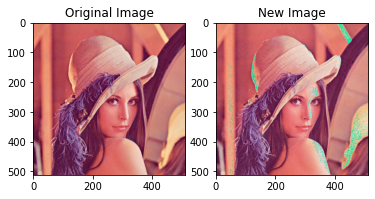

In [14]:
image = cv2.imread("lenna.png")
width, height, _ = image.shape
Noise = np.random.uniform(0, 20, (height, width, 3)).astype(np.uint8)

new_image = image + Noise

plot2Images(image, new_image, True)

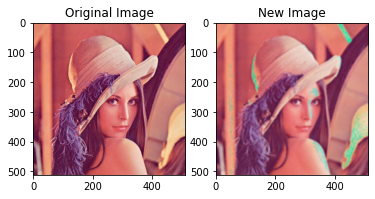

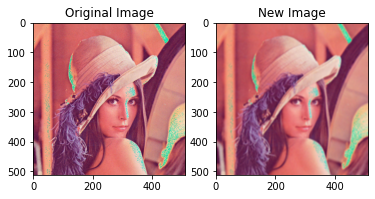

In [16]:
kernel = np.ones((6, 6)) / 36
image_filtered = cv2.filter2D(src=new_image, ddepth=-1, kernel=kernel)

plot2Images(image, image_filtered, True)
plot2Images(new_image, image_filtered, True)

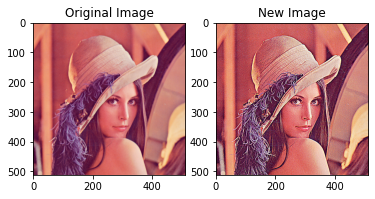

In [17]:
# Image sharpening means smoothing the image and enhancing the edges.
# We can achieve image sharpening similar to how we apply filters to an image.

kernel = np.array([[-1, -1, -1],
                    [-1, 9, -1],
                    [-1, -1, -1]])

image_filtered = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

plot2Images(image, image_filtered, True)

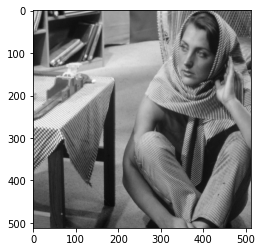

In [18]:
# Edge detection
imag_gray = cv2.imread("barbara.png", cv2.IMREAD_GRAYSCALE)
imag_gray = cv2.GaussianBlur(imag_gray, (3, 3), sigmaX=0.1, sigmaY=0.1) # To smooth the image.
# This will decrease the noise that may affect the gradient.

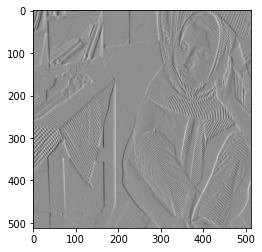

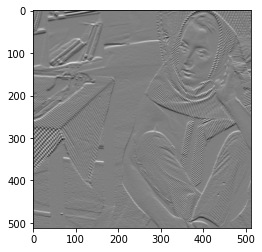

In [19]:
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(src=imag_gray, ddepth=ddepth, dx=1, dy=0, ksize=3)
grad_y = cv2.Sobel(src=imag_gray, ddepth=ddepth, dx=0, dy=1, ksize=3)

plt.imshow(grad_x, cmap="gray")
plt.show()
plt.imshow(grad_y, cmap="gray")
plt.show()

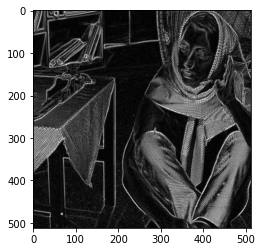

In [21]:
# We can also calculate the magnitude of these two gradients.
abs_grad_x = cv2.convertScaleAbs(grad_x) # This calculates the absolute values and convert the result to 8 bit.
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0) # This calculates the sum of the two arrays given above.
plt.imshow(grad, cmap="gray")
# The areas with high intensity values represent the edges.